# Questions to Answer

1. Which countries are the happiest and why?

2. Are there geographical trends in happiness?

3. How has happiness evolved globally over the years?

4. Which countries have seen the greatest changes in happiness over time?

5. Which factors have the most significant impact on happiness?

6. What is the relationship between GDP and happiness?

7. How do perceptions of corruption correlate with happiness?

8. How do freedom to make life choices and happiness relate?

## Load the Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('/Users/bartlomiejpodstawek/PycharmProjects/analiza_danych_projekt/Python_Data_Analytics_Course-main/project_world_happiness_report/World Happiness Report 2024.csv') #'/kaggle/input/world-happiness-report-2024/World Happiness Report 2024.csv'

# Create copy of dataset
df = df.copy()

## Check Basic Information and Missing Data

In [3]:
# Check basic information about the data
print(df.shape)

(2363, 11)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
None


In [5]:
# Check for missing data
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


## Cleaning Data and Descriptive Statistics

In [6]:
# Remove rows with missing values
df_cleaned = df.dropna()

print(f"Shape: {df_cleaned.shape}")

Shape: (2097, 11)


In [7]:
# Check if we have duplicates rows
duplicates = df_cleaned[df_cleaned.duplicated() == True]

print(duplicates)

Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


# Questions to answer:

## Question 1: Which countries are the happiest and why?

In [8]:
# 10 Najszczęśliwszych krajów na świecie
median_life_ladder_by_country = df_cleaned.groupby('Country name')['Life Ladder'].median().reset_index()

top_10_happiest_countries = median_life_ladder_by_country.sort_values(by='Life Ladder', ascending=False).head(10)

# Ustaw indeks na 'Country name'
top_10_happiest_countries.set_index('Country name', inplace=True)

# Zmień nazwę kolumny
top_10_happiest_countries.rename(columns={'Life Ladder': 'Life Ladder Median Value'}, inplace=True)

# Usuń niepotrzebne kolumny (jeśli są)
top_10_happiest_countries = top_10_happiest_countries[['Life Ladder Median Value']]

# Wyświetl wynik
top_10_happiest_countries

,Life Ladder Median Value
Country name,
Finland,7.671538
Denmark,7.593702
Iceland,7.505714
Switzerland,7.492804
Netherlands,7.455422
Norway,7.444262
Canada,7.412773
Sweden,7.374792
Israel,7.320563


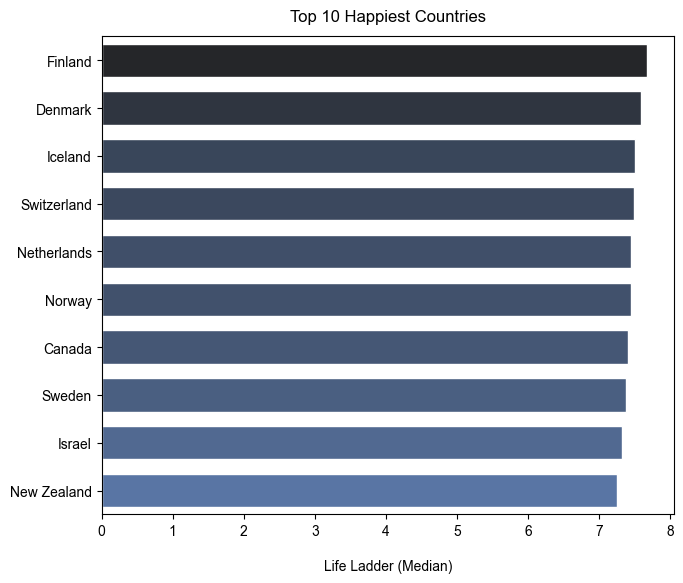

In [9]:
# Top 10 Highest Paid Skills for Data Analysts
fig, ax = plt.subplots(figsize=(7, 6))

sns.set_theme(style='ticks')
sns.barplot(
    data = top_10_happiest_countries,
    x = 'Life Ladder Median Value',
    y = top_10_happiest_countries.index,
    hue = 'Life Ladder Median Value',
    ax = ax,
    palette = 'dark:b_r',
    width = 0.7,
    dodge = False
)
ax.legend().remove()

# top_10_happiest_countries[::-1].plot(kind='barh', y='Life Ladder Median Value' , ax=ax , legend=False)
ax.set_title('Top 10 Happiest Countries', pad=11)
ax.set_ylabel('')
ax.set_xlabel('Life Ladder (Median)', labelpad=15)
plt.tight_layout()
plt.show()

In [10]:
# Calculate the median Life Ladder and relevant factors by country
median_happiness_factors = df_cleaned.groupby('Country name')[[
                                                     'Life Ladder',
                                                     'Log GDP per capita', 
                                                     'Healthy life expectancy at birth'
                                                     ]].median().reset_index()
    
# Calculate the mean for 'Social support'
mean_social_support = df_cleaned.groupby('Country name')['Social support'].mean().reset_index()

merged_factors = pd.merge(median_happiness_factors, mean_social_support, on='Country name')    
    
top_happiness_factors = merged_factors.sort_values(by='Life Ladder', ascending=False).head(10)

top_happiness_factors.set_index('Country name', inplace=True)

# Sort the top 10 countries by Life Ladder in ascending order
top_10_indexed = top_happiness_factors.sort_values(by='Life Ladder', ascending=True)

top_10_indexed

,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Social support
Country name,,,,
New Zealand,7.257382,10.621686,69.900002,0.951680
Israel,7.320563,10.535632,71.800003,0.908625
Sweden,7.374792,10.838187,71.400002,0.927878
Canada,7.412773,10.767591,71.099998,0.932602
Norway,7.444262,11.066423,71.300003,0.948437
Netherlands,7.455422,10.893921,71.137501,0.930281
Switzerland,7.492804,11.125900,72.099998,0.935003
Iceland,7.505714,10.878072,71.937500,0.978225
Denmark,7.593702,10.888726,70.500000,0.953921


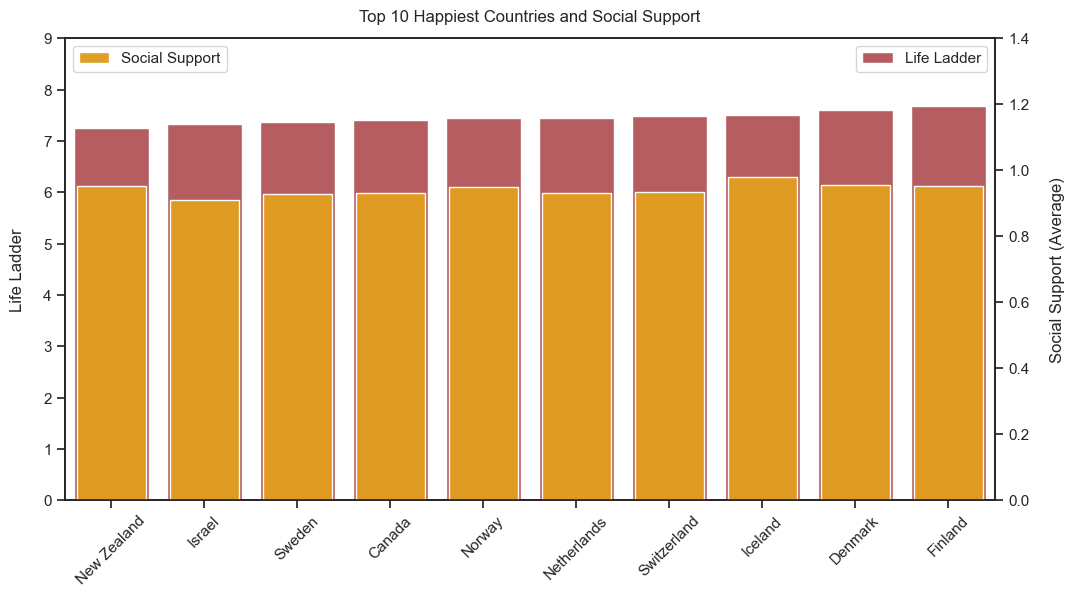

In [11]:
# Plot: Top 10 Happiest Countries with Life Ladder and Social Support
plt.figure(figsize=(12, 6))

# Bar plot for Life Ladder
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Life Ladder'], color='r', label='Life Ladder')
plt.ylabel('Life Ladder', labelpad=13)
plt.xlabel('')
plt.title('Top 10 Happiest Countries and Social Support', pad=12)
plt.xticks(rotation=45)
plt.ylim(0,9)

# Adding bars for Social Support
plt.twinx()  # Create a second y-axis
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Social support'], color='orange', label='Social Support', alpha=0.98, width=0.74)
plt.ylabel('Social Support (Average)', labelpad=15)
plt.ylim(0, 1.4)

# Legends
plt.legend(loc='upper left')
plt.show()

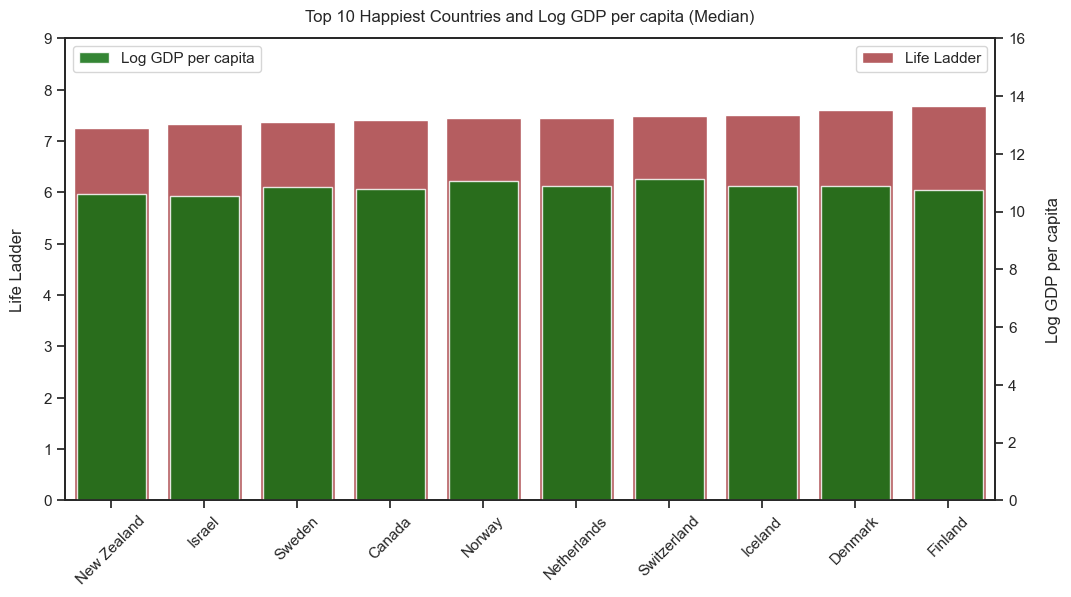

In [12]:
# Plot: Top 10 Happiest Countries with Life Ladder and Log GDP per capita
plt.figure(figsize=(12, 6))

# Bar plot for Life Ladder
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Life Ladder'], color='r', label='Life Ladder')
plt.ylabel('Life Ladder', labelpad=13)
plt.xlabel('')
plt.title('Top 10 Happiest Countries and Log GDP per capita (Median)', pad=12)
plt.xticks(rotation=45)
plt.ylim(0,9)

# Adding bars for Log GDP per capita
plt.twinx()  # Create a second y-axis
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Log GDP per capita'], color='green', label='Log GDP per capita', alpha=0.85, width=0.74)
plt.ylabel('Log GDP per capita', labelpad=15)
plt.ylim(0,16)

# Legends
plt.legend(loc='upper left')
plt.show()

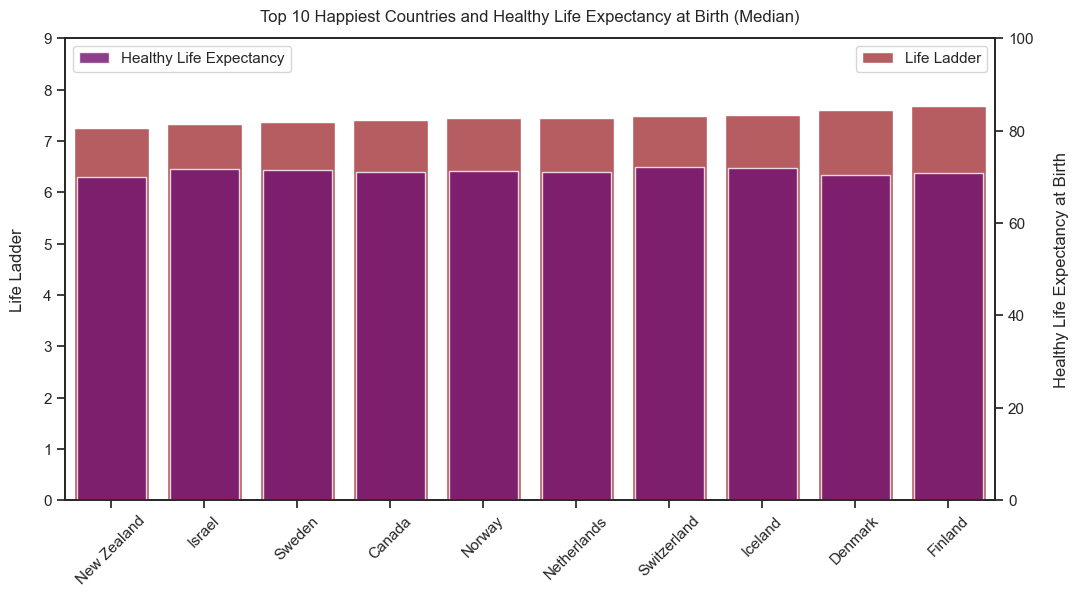

In [13]:
# Plot: Top 10 Happiest Countries with Life Ladder and Healthy Life Expectancy at Birth
plt.figure(figsize=(12, 6))

# Bar plot for Life Ladder
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Life Ladder'], color='r', label='Life Ladder')
plt.ylabel('Life Ladder', labelpad=13)
plt.xlabel('')
plt.title('Top 10 Happiest Countries and Healthy Life Expectancy at Birth (Median)', pad=12)
plt.xticks(rotation=45)
plt.ylim(0,9)

# Adding bars for Healthy Life Expectancy at Birth
plt.twinx()  # Create a second y-axis
sns.barplot(x=top_10_indexed.index, y=top_10_indexed['Healthy life expectancy at birth'], color='purple', label='Healthy Life Expectancy', alpha=0.80, width=0.74)
plt.ylabel('Healthy Life Expectancy at Birth', labelpad=15)
plt.ylim(0,100)

# Legends
plt.legend(loc='upper left')
plt.show()

## Question 2: Are there geographical trends in happiness?

In [14]:
import geopandas as gpd

# Geo Data from Natural Earth Data 
world = gpd.read_file('/Users/bartlomiejpodstawek/PycharmProjects/analiza_danych_projekt/Python_Data_Analytics_Course-main/project_world_happiness_report/countries_data/ne_110m_admin_0_countries.shp') #'/kaggle/input/countries-data/countries_data/ne_110m_admin_0_countries.shp'

In [15]:
# Replacing country names to ensure consistency with the geographic dataset

df_cleaned.loc[:, 'Country name'] = df_cleaned['Country name'].replace({
'United States': 'United States of America',
'Türkiye': 'Turkey',
'Congo (Kinshasa)': 'Democratic Republic of the Congo',
'Taiwan Province of China': 'Taiwan',
'Eswatini': 'eSwatini'
})

# Merging data based on country names
# Assuming 'Country name' in my dataset matches 'ADMIN' in the GeoDataFrame
merged_data = world.merge(df_cleaned, how='left', left_on='ADMIN', right_on='Country name')

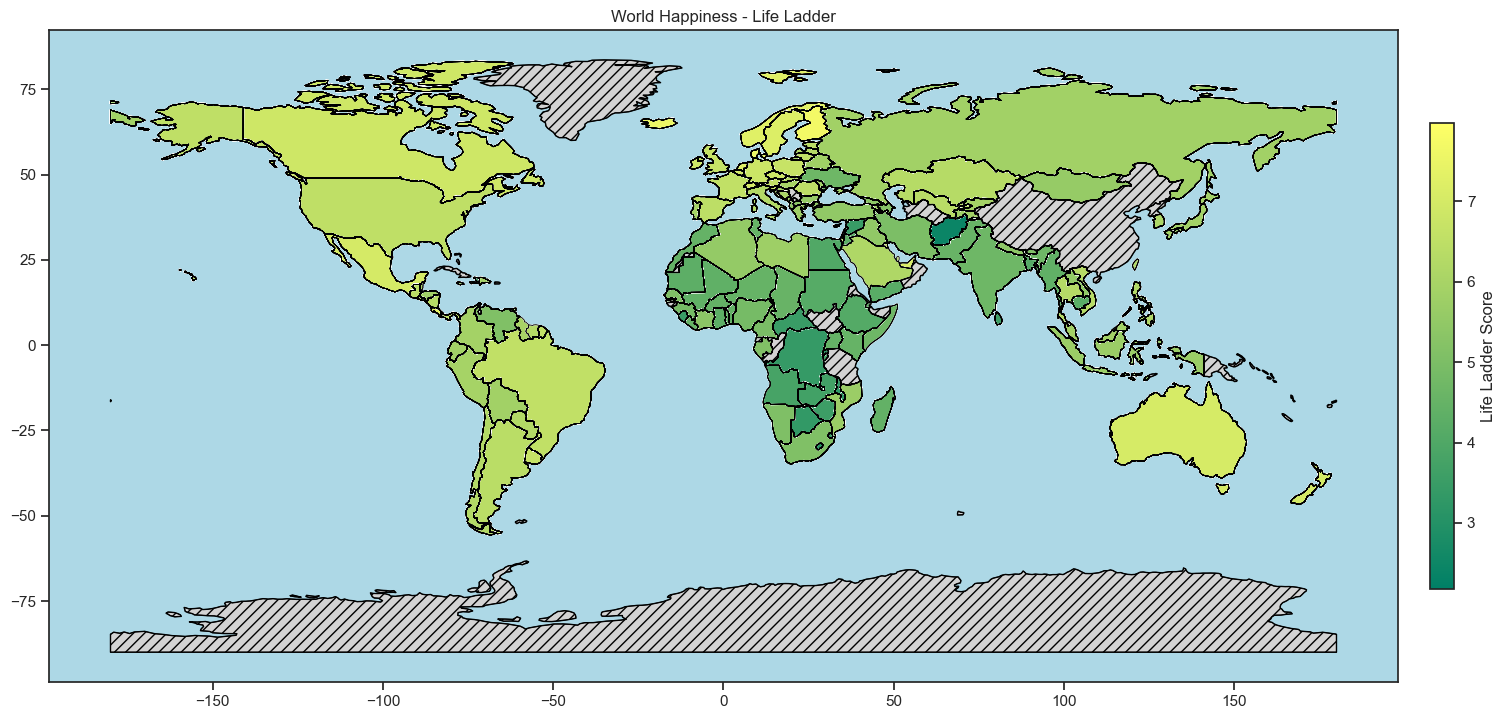

In [16]:
# Plotting
plt.figure(figsize=(17, 17))

# Setting the axis background to blue
ax = plt.gca()
ax.set_facecolor('#ADD8E6')

# Drawing country borders
merged_data.boundary.plot(ax=ax, linewidth=0.6, color='black')

# Using a green-blue color palette
merged_data.plot(column='Life Ladder',
                 ax=ax,
                 legend=True,
                 cmap='summer',  # Color palette
                 legend_kwds={
                     'label': "Life Ladder Score",
                     'orientation': "vertical",  # Vertical legend on the right
                     'shrink': 0.28,  # Shrink the legend size
                     'pad': 0.02,
                     'aspect': 20  # Setting the size of the legend bar
                 },
                 missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///"}
                )

plt.title('World Happiness - Life Ladder')
plt.tight_layout()
plt.show()

## Question 3: How has happiness evolved globally over the years?

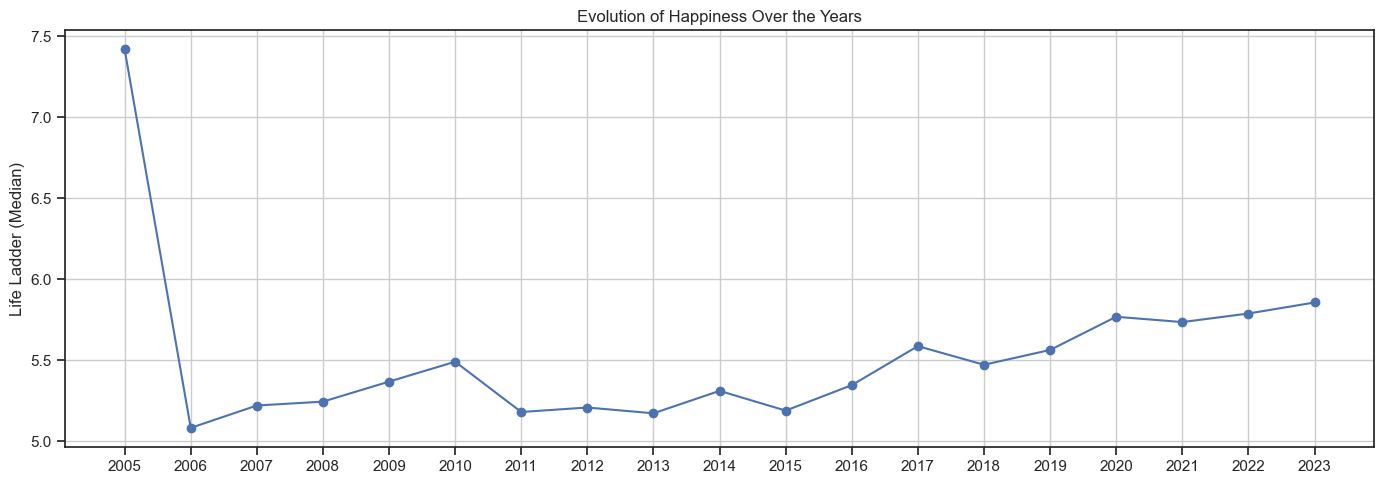

In [17]:
# Calculate the median Life Ladder for each year
median_happiness_per_year = df_cleaned.groupby('year')['Life Ladder'].median()

plt.figure(figsize=(14, 5))
plt.plot(median_happiness_per_year.index, median_happiness_per_year.values, marker='o', linestyle='-')

plt.title('Evolution of Happiness Over the Years')  
plt.xlabel('')  
plt.ylabel('Life Ladder (Median)')  
plt.grid(True)
plt.xticks(median_happiness_per_year.index)
plt.tight_layout()
plt.show()

## Question 4: Which countries have seen the greatest changes in happiness over time?

In [18]:
# Calculate the change in Life Ladder scores for each country over time
happiness_change = df_cleaned.groupby('Country name').agg(
    start_year=('year', 'min'),
    end_year=('year', 'max'),
    start_happiness=('Life Ladder', 'first'),
    end_happiness=('Life Ladder', 'last')
).reset_index()

# Calculate the change in happiness
happiness_change['happiness_change'] = happiness_change['end_happiness'] - happiness_change['start_happiness']

# Sort the countries by happiness change
top_increase = happiness_change.sort_values(by='happiness_change', ascending=False).head(10)
top_decrease = happiness_change.sort_values(by='happiness_change').head(10)

# Combine results for visualization
top_changes = pd.concat([top_increase, top_decrease])

# Display the summary of changes
top_changes[['Country name', 'start_year', 'end_year', 'start_happiness', 'end_happiness', 'happiness_change']]

,Country name,start_year,end_year,start_happiness,end_happiness,happiness_change
101,Nicaragua,2006,2023,4.460158,6.362125,1.901967
20,Bulgaria,2007,2023,3.843798,5.589599,1.745801
119,Serbia,2007,2023,4.750384,6.441014,1.690630
49,Georgia,2006,2023,3.675108,5.350635,1.675527
76,Latvia,2006,2023,4.709502,6.295645,1.586143
108,Paraguay,2006,2023,4.730082,6.213789,1.483706
5,Armenia,2006,2023,4.289311,5.679090,1.389779
74,Kyrgyzstan,2006,2023,4.641399,5.909509,1.268110
135,Tajikistan,2006,2017,4.613099,5.829234,1.216135
138,Togo,2006,2023,3.202429,4.364939,1.162509


/var/folders/m4/txcpxbmd1096vr9sz2ccybqr0000gn/T/ipykernel_28562/1005630638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_changes, x='happiness_change', y='Country name', palette='coolwarm')


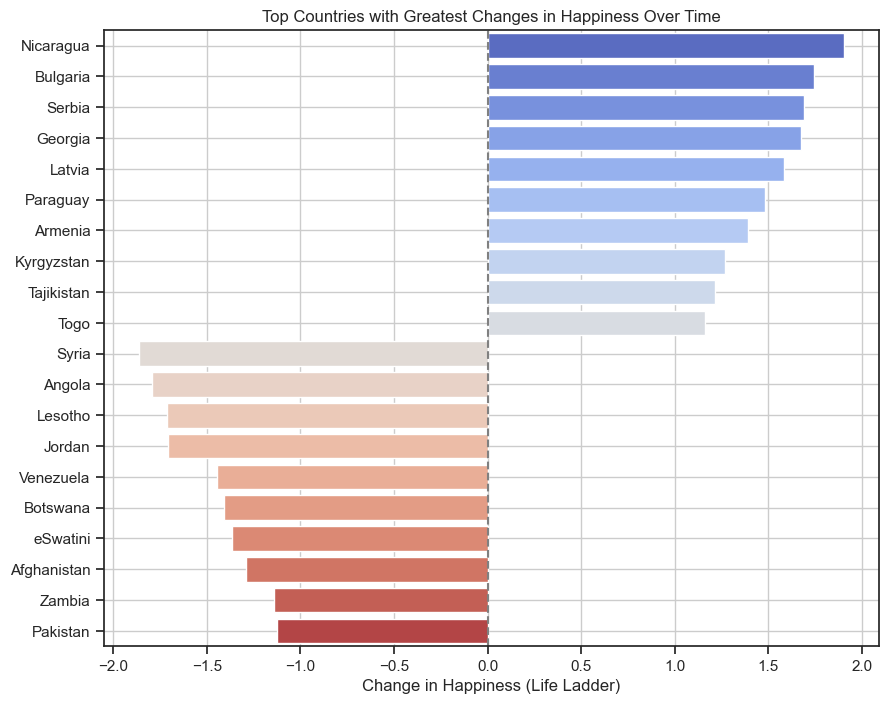

In [19]:
# Visualize the changes in happiness
plt.figure(figsize=(10,8))
sns.barplot(data=top_changes, x='happiness_change', y='Country name', palette='coolwarm')
plt.title('Top Countries with Greatest Changes in Happiness Over Time')
plt.xlabel('Change in Happiness (Life Ladder)')
plt.ylabel('')
plt.axvline(0, color='grey', linestyle='--')
plt.grid()
plt.show()

## Question 5: Which factors have the most significant impact on happiness?

In [20]:
# Calculate correlation coefficients for relevant factors
correlation_matrix = df_cleaned[['Life Ladder', 'Social support', 'Log GDP per capita', 'Healthy life expectancy at birth']].corr()

correlation_matrix

,Life Ladder,Social support,Log GDP per capita,Healthy life expectancy at birth
Life Ladder,1.000000,0.724916,0.787122,0.725232
Social support,0.724916,1.000000,0.699005,0.602140
Log GDP per capita,0.787122,0.699005,1.000000,0.832139
Healthy life expectancy at birth,0.725232,0.602140,0.832139,1.000000


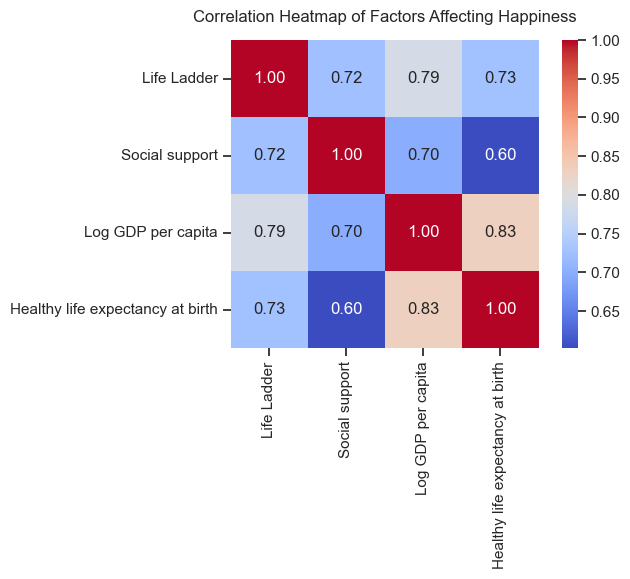

In [21]:
# Plotting the heatmap of correlations
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Factors Affecting Happiness', pad=13)
plt.show()

## Question 6: What is the relationship between GDP and happiness?

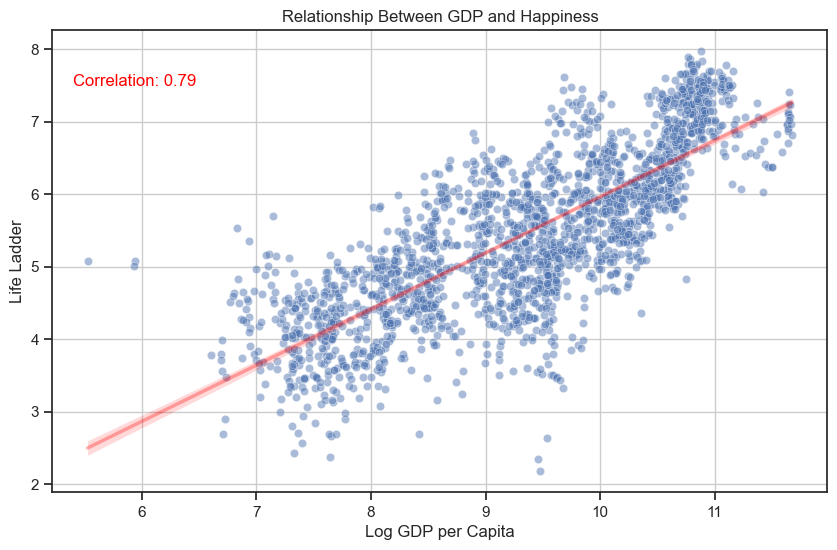

In [22]:
#Scatter plot to show the relationship between Log GDP per capita and Life Ladder
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Log GDP per capita', y='Life Ladder', alpha=0.48)
sns.regplot(data=df_cleaned, x='Log GDP per capita', y='Life Ladder', scatter=False, color='red', line_kws={"linewidth": 2.5, "alpha": 0.3})

plt.title('Relationship Between GDP and Happiness')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Ladder')
plt.grid()

# Calculate the correlation coefficient
correlation = df_cleaned['Log GDP per capita'].corr(df_cleaned['Life Ladder'])
plt.text(5.4,7.5, f'Correlation: {correlation:.2f}', fontsize=12, color='red')
plt.show()

## Question 7: How do perceptions of corruption correlate with happiness?

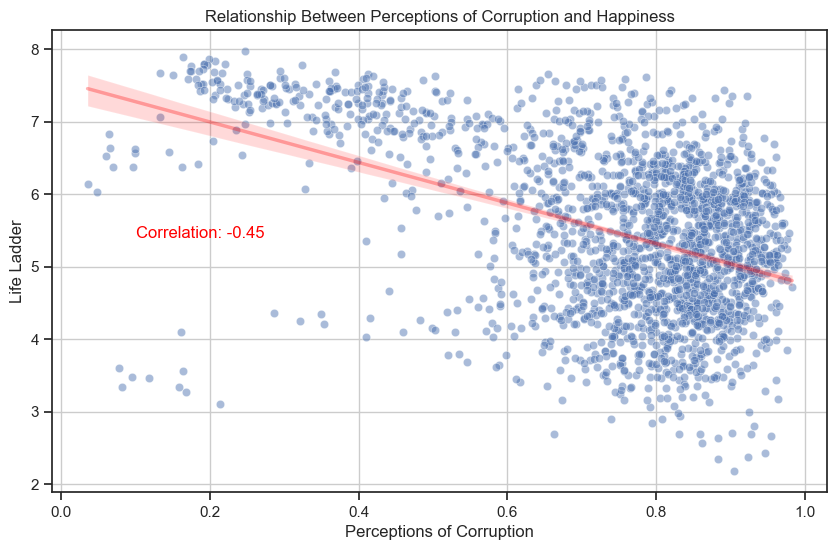

In [23]:
# Scatter plot to show the relationship between Perceptions of Corruption and Life Ladder
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Perceptions of corruption', y='Life Ladder', alpha=0.48)
sns.regplot(data=df_cleaned, x='Perceptions of corruption', y='Life Ladder', scatter=False, color='red', line_kws={"linewidth": 2.5, "alpha": 0.3})

plt.title('Relationship Between Perceptions of Corruption and Happiness')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Life Ladder')
plt.grid()

# Calculate the correlation coefficient
correlation = df_cleaned['Perceptions of corruption'].corr(df_cleaned['Life Ladder'])
plt.text(0.1, 5.4, f'Correlation: {correlation:.2f}', fontsize=12, color='red')
plt.show()

## Question 8: How do freedom to make life choices and happiness relate?

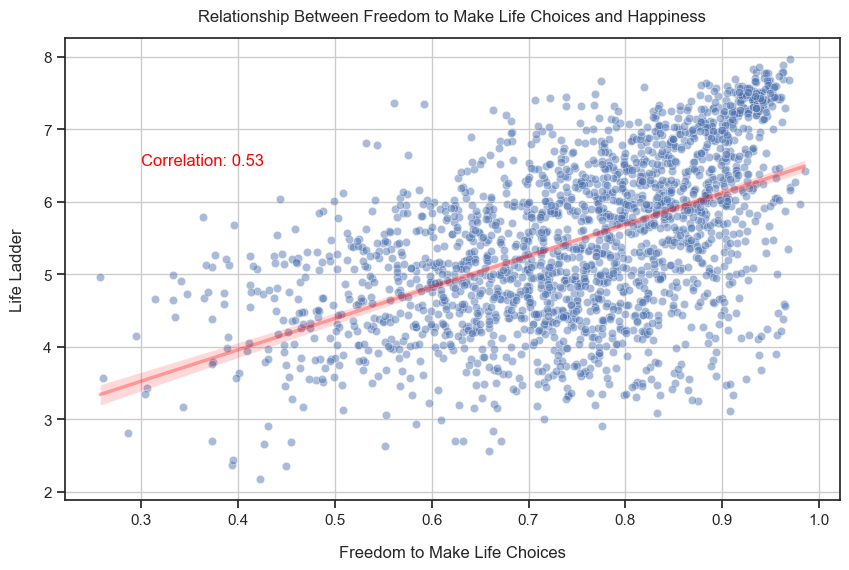

In [24]:
# Scatter plot to show the relationship between Freedom to make life choices and Life Ladder
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Freedom to make life choices', y='Life Ladder', alpha=0.48)
sns.regplot(data=df_cleaned, x='Freedom to make life choices', y='Life Ladder', scatter=False, color='red', line_kws={"linewidth": 2.5, "alpha": 0.3})

plt.title('Relationship Between Freedom to Make Life Choices and Happiness', pad=12)
plt.xlabel('Freedom to Make Life Choices', labelpad=13)
plt.ylabel('Life Ladder', labelpad=13)
plt.grid()

# Calculate the correlation coefficient
correlation = df_cleaned['Freedom to make life choices'].corr(df_cleaned['Life Ladder'])
plt.text(0.3, 6.5, f'Correlation: {correlation:.2f}', fontsize=12, color='red')
plt.show()